<a href="https://colab.research.google.com/github/tejasmaskar09/bml-exp/blob/main/knearest_neighibhour_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.95


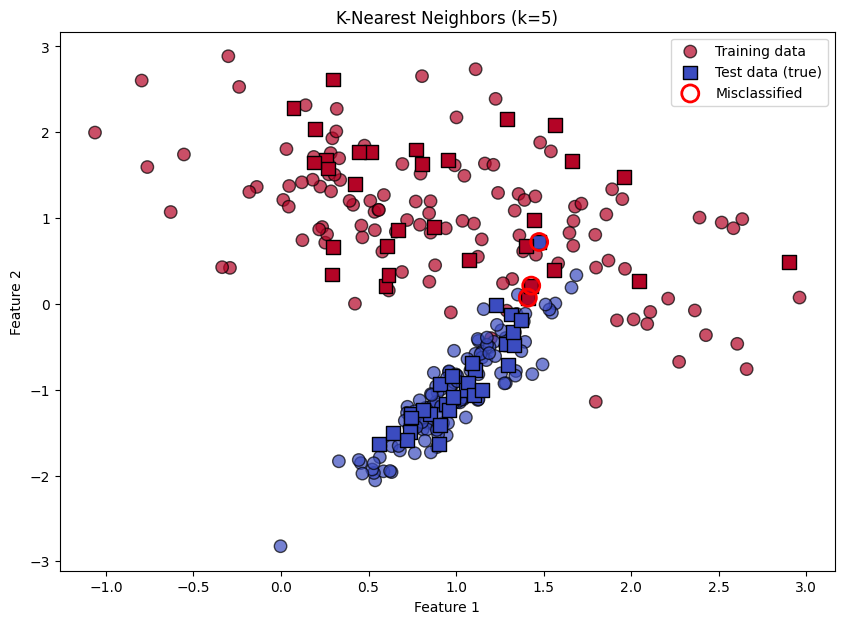

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two points"""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, x_test, k=3):
    """
    Make a prediction for a single test sample using KNN

    Parameters:
    -----------
    X_train : array-like, shape (n_samples, n_features)
        Training data
    y_train : array-like, shape (n_samples,)
        Target values for training data
    x_test : array-like, shape (n_features,)
        Test sample
    k : int, default=3
        Number of neighbors to consider

    Returns:
    --------
    predicted_class : int or str
        Predicted class for the test sample
    """
    # Calculate distances between test point and all training points
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]

    # Get indices of k nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Get the labels of k nearest neighbors
    k_nearest_labels = [y_train[i] for i in k_indices]

    # Return most common class among k neighbors
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

def knn_classifier(X_train, y_train, X_test, k=3):
    """
    KNN classifier for multiple test samples

    Parameters:
    -----------
    X_train : array-like, shape (n_samples, n_features)
        Training data
    y_train : array-like, shape (n_samples,)
        Target values for training data
    X_test : array-like, shape (n_test_samples, n_features)
        Test data
    k : int, default=3
        Number of neighbors to consider

    Returns:
    --------
    predictions : array, shape (n_test_samples,)
        Predicted classes for each test sample
    """
    predictions = [knn_predict(X_train, y_train, x, k) for x in X_test]
    return np.array(predictions)

# Generate sample data
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42, n_clusters_per_class=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply KNN
k = 5
y_pred = knn_classifier(X_train, y_train, X_test, k=k)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plotting
plt.figure(figsize=(10, 7))

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', s=80, alpha=0.7, edgecolors='k', label='Training data')

# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='s', s=100, alpha=1, edgecolors='k', label='Test data (true)')

# Highlight test samples where prediction is wrong
mask = y_pred != y_test
if np.any(mask):
    plt.scatter(X_test[mask, 0], X_test[mask, 1], s=150, facecolors='none',
                edgecolors='red', linewidth=2, label='Misclassified')

plt.title(f"K-Nearest Neighbors (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()